<a href="https://colab.research.google.com/github/TeinkBR/1D_harmonic_oscillator/blob/main/3D_Emulation_for_Infrared_extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
In this notebook, we will explore how to use emulation technology to perform infrared extrapolation. 

# Training calculations
Some codes are from Jingyi's notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import pickle
#load interactive widgets
import ipywidgets as widgets
from scipy import interpolate
from math import exp,factorial                          #gaussian quadrature method                        
from scipy.special import hermite,gamma, loggamma

from sympy import diff, integrate, exp          
from scipy.misc import derivative              # import from scipy derivative 
# Import hermite polynomials and factorial to use in normalization factor
from scipy.special import hermite
#If your screen has retina display this will increase resolution of plots
%config InlineBackend.figure_format = 'retina'
import scipy.integrate as integrate
import scipy.special as special
from numpy import linalg as LA
from scipy.linalg import eigh
%matplotlib inline

In [2]:
class truncation_scheme:
  def __init__(self,mesh,e_max,length, omega, hbar,mass):
  ### input variable 
    
    self.e_max=e_max      

    self.length=length     
    
    self.omega = omega  
    
    self.starting_position=-length/2 
  
    self.ending_position=length/2   
    
    self.mesh=mesh  
    
    self.hbar=hbar 
  
    self.mass=mass 
  
    self.scaling_factor_b=hbar/np.sqrt(mass*omega)
    ### defining meshpoint for the coordinates of the system
    self.meshpoint_x,self.weight_x = np.polynomial.legendre.leggauss(mesh) 

    self.meshpoint_x=self.length/2*self.meshpoint_x

    self.meshpoint_y,self.weight_y = np.polynomial.legendre.leggauss(mesh) 

    self.meshpoint_y=self.length/2*self.meshpoint_y


  
    
    self.x_coord, self.y_coord = np.meshgrid(self.meshpoint_x, self.meshpoint_y)
    
   
    
    self.weight = self.length/2*self.weight_x

    self.energy_level=np.arange(0,self.e_max) 


Generating 3D basis wave function, our ansatz

In [3]:
class basis_wave_function_class():
  def __init__(self,truncation_scheme):
    self.x_coord=truncation_scheme.x_coord
    self.y_coord=truncation_scheme.y_coord
    
    self.weight = truncation_scheme.weight
    self.energy_level = truncation_scheme.energy_level
    self.e_max = truncation_scheme.e_max
    ### harmonic wave function used for our basis
    self.basis_wave_function_ilevel_ix = np.zeros((self.e_max,len(self.x_coord),len(self.y_coord)))

    for i in self.energy_level:
      self.basis_wave_function_ilevel_ix[i]=1./np.sqrt(np.sqrt(np.pi))\
             *np.exp(-0.5*(i*np.log(2) + loggamma(i + 1.) + self.x_coord**2+self.y_coord**2)) * hermite(i)(np.sqrt(self.x_coord**2+self.y_coord**2))


In [4]:
mesh=100
e_max=20
length=20
omega=35
hbar=197.3
mass=940
alpha=0.5
lambda_coeff=2
V_0=50

In [5]:
truncation_scheme_1 = truncation_scheme(mesh,e_max,length,omega,hbar,mass)

In [6]:
basis_wave_function_1 = basis_wave_function_class(truncation_scheme_1)

In [7]:
np.shape(basis_wave_function_1.basis_wave_function_ilevel_ix[0])

(100, 100)

In [8]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

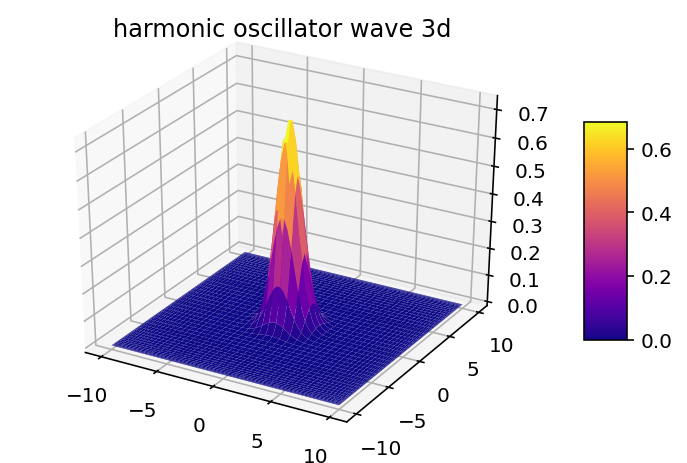

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.


# Plot the surface.
surf = ax.plot_surface(
    truncation_scheme_1.x_coord, truncation_scheme_1.y_coord, basis_wave_function_1.basis_wave_function_ilevel_ix[0], cmap='plasma',
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('harmonic oscillator wave 3d')
plt.show()

In [10]:
### the following is the normalization of the HO's states
for i in truncation_scheme_1.energy_level:
  print(f'the normlization of state {i}: {basis_wave_function_1.basis_wave_function_ilevel_ix[i]**2 @ truncation_scheme_1.weight}')

the normlization of state 0: [3.93925076e-44 5.02852421e-44 7.79392468e-44 1.46439903e-43
 3.32724820e-43 9.11259469e-43 2.99654438e-42 1.17760954e-41
 5.50125105e-41 3.03658447e-40 1.96731572e-39 1.48510365e-38
 1.29599482e-37 1.29639490e-36 1.47316369e-35 1.88373606e-34
 2.68361294e-33 4.21543636e-32 7.22294518e-31 1.33510067e-29
 2.63203553e-28 5.47001262e-27 1.18428167e-25 2.63920791e-24
 5.98104256e-23 1.36166157e-21 3.07642977e-20 6.81427813e-19
 1.46194436e-17 3.00176881e-16 5.82949345e-15 1.05841960e-13
 1.77639237e-12 2.72576130e-11 3.78329909e-10 4.70136247e-09
 5.17929853e-08 5.01118712e-07 4.22066977e-06 3.06886054e-05
 1.91144308e-04 1.01258167e-03 4.53266910e-03 1.70447179e-02
 5.35660720e-02 1.40058937e-01 3.03544147e-01 5.43638724e-01
 8.02763233e-01 9.75869398e-01 9.75869398e-01 8.02763233e-01
 5.43638724e-01 3.03544147e-01 1.40058937e-01 5.35660720e-02
 1.70447179e-02 4.53266910e-03 1.01258167e-03 1.91144308e-04
 3.06886054e-05 4.22066977e-06 5.01118712e-07 5.17929853

In [11]:
class Hamiltonian_class:
  def __init__(self,truncation_scheme, V_s_func_of_x_unscaled, test_r_sqr_included = True ):  
    ### setting Hamiltonian Numerical space
    ### Kinetic term + Potential Term + Harmonic oscillator trap
    self.truncation_scheme = truncation_scheme 
    self.hbar = truncation_scheme.hbar
    self.mass = truncation_scheme.mass
    self.omega = truncation_scheme.omega 

    self.x_coord=truncation_scheme.x_coord
    self.y_coord=truncation_scheme.y_coord

    self.weight = truncation_scheme.weight
    self.energy_level = truncation_scheme.energy_level
    self.e_max = truncation_scheme.e_max
    self.basis_wave_function_ilevel_ix  = basis_wave_function_class(truncation_scheme).basis_wave_function_ilevel_ix
    self.scaling_factor_b= truncation_scheme.scaling_factor_b 

    self.H_p_sqr=np.zeros((self.e_max,self.e_max))
    self.H_r_sqr=np.zeros((self.e_max,self.e_max))

    ## this is the potential on the x mesh after rescsling
    self.V_s_ix = np.array([[[V_s_func_of_x_unscaled(np.sqrt(x**2+y**2)*self.scaling_factor_b)/self.omega 
                            for x in self.x_coord ]for y in self.y_coord]]) 
    
    self.V_s_ilevel_ilevel = [[(self.weight*self.basis_wave_function_ilevel_ix[i] 
                                * self.V_s_ix) 
                                       @(self.basis_wave_function_ilevel_ix[j])  
                              for j in self.energy_level]  
                              for i in self.energy_level]
    
  ### integration using numerical gaussian quadrature 

   ### Now we set Hamiltonian P square and R square values from the book of Quantum Mechanics By Griffith     
   ### i & j here are the energy level of the psi and psi conjugate <psi|H|psi>, formula from the textbook 
   ### mentioned above, see overleaf file

    for i in range(self.e_max):
     for j in range(self.e_max):   
        if (i == j) :
          self.H_p_sqr[i][j]= 0.25*(2*j+1)
          self.H_r_sqr[i][j] = 0.25*(2*j+1)
          
        elif (i == j-2):
           
          self.H_p_sqr[i][j]= -0.25*np.sqrt(j*(j-1))
          self.H_r_sqr[i][j] = 0.25*np.sqrt(j*(j-1))

            
        elif (i == j+2):
           
          self.H_p_sqr[i][j]= -0.25*np.sqrt((j+2)*(j+1))
          self.H_r_sqr[i][j] = 0.25*np.sqrt((j+2)*(j+1))
            
        else:
          
          self.H_p_sqr[i][j]=  0
          self.H_r_sqr[i][j]=  0

     ### Total H include Potential V + Kinetic T + Harmonic Oscillator Trap R_squared

    if test_r_sqr_included:
          self.Total_H= self.V_s_ilevel_ilevel +self.H_p_sqr+self.H_r_sqr
    else : 
      self.Total_H= self.V_s_ilevel_ilevel +self.H_p_sqr 
   
     ### getting eigenvalue(energy) and eigenvector(wavefunction) from the hamiltonian
    self.eigenval_iHlevel,self.psi_iHOlevel_iHlevel =LA.eigh(self.Total_H)
     ### same thing, but computed from numerical Total H, might not be useful
    
     ## <Phi|psi>, for plotting
    self.psi_iHlevel_ix = self.psi_iHOlevel_iHlevel.T @ self.basis_wave_function_ilevel_ix

    

Define the strong interaction potential function

In [12]:
class PT_pot_class:
  def __init__(self, hbar, mass, alpha, lambda_coeff):
    self.hbar = hbar 
    self.mass = mass 
    self.alpha = alpha 
    self.lambda_coeff= lambda_coeff 
    self.eigenE_ifullH_analy = - (self.hbar*self.alpha*(self.lambda_coeff-1-np.arange(0,e_max)))**2/(2*self.mass)

  def V_s_func_of_x_unscaled(self, x,y):
    return  -(self.alpha*self.hbar)**2/(2*self.mass) *self.lambda_coeff*(
      self.lambda_coeff-1)/(np.cosh(self.alpha* np.sqrt(x**2+y**2) )**2)


In [13]:
alpha, lambda_coeff

(0.5, 2)

In [14]:
x_unscaled_list = np.linspace(-5,5,100)
y_unscaled_list = np.linspace(-5,5,100)
x_unscaled_list,y_unscaled_list=np.meshgrid(x_unscaled_list,y_unscaled_list)
PT_pot_1 = PT_pot_class(hbar, mass, alpha, lambda_coeff)

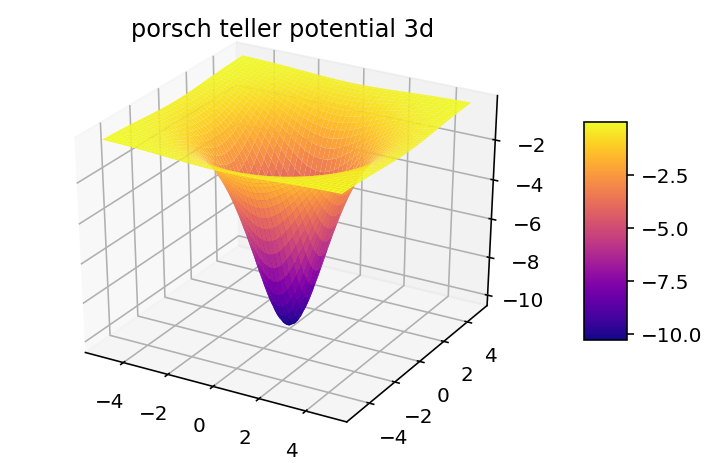

In [15]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.


# Plot the surface.
surf = ax.plot_surface(
    x_unscaled_list,y_unscaled_list, PT_pot_1.V_s_func_of_x_unscaled(x_unscaled_list,y_unscaled_list), cmap='plasma',
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('porsch teller potential 3d')
plt.show()

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.


# Plot the surface.
surf = ax.plot_surface(
    x_unscaled_list,y_unscaled_list, PT_pot_1.V_s_func_of_x_unscaled(x_unscaled_list,y_unscaled_list)+, cmap='plasma',
                       linewidth=0, antialiased=True)

# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('porsch teller potential 3d')
plt.show()

# Test the training calculations codes for PT potential 

In [16]:
H_class_for_PT_pot_1  =  Hamiltonian_class(truncation_scheme_1 , PT_pot_1.V_s_func_of_x_unscaled(x_unscaled_list,y_unscaled_list), test_r_sqr_included=False)

TypeError: ignored

In [ ]:
H_class_for_PT_pot_1.eigenval_iHlevel*omega 

In [ ]:
PT_pot_1.eigenE_ifullH_analy

In [ ]:
e_max_list = np.arange(20,80,20) 
omega_list = np.arange(1,110,10) 
gs_E_iemax_iomega = np.zeros((len(e_max_list), len(omega_list)))
for iemax, e_max in enumerate(e_max_list):
  for iomega, omega in enumerate(omega_list): 
    truncation_scheme_tp = truncation_scheme(mesh,e_max,length,omega,hbar,mass)
    H_class_for_PT_pot_tp  =  Hamiltonian_class(truncation_scheme_tp , PT_pot_1.V_s_func_of_x_unscaled, test_r_sqr_included=False)
    gs_E_iemax_iomega[iemax, iomega] = H_class_for_PT_pot_tp.eigenval_iHlevel[0]*omega 


In [ ]:
for iemax, e_max in enumerate(e_max_list):
  plt.plot(omega_list, gs_E_iemax_iomega[iemax], label = f'e_max = {e_max}' )
#plt.yscale('log')
plt.legend()
plt.show()

# Construct a list of training Hamiltonian classes based on PT potential



In [ ]:
omega_training_list = np.array( [30,30.5, 31] )
e_max_training = 100
print(f'length={length}, mesh= {mesh}')

In [ ]:
H_class_training_list =  []
for omega in omega_training_list : 
  truncation_scheme_tp = truncation_scheme(mesh,e_max_training,length,omega,hbar,mass)
  H_class_training_list.append(Hamiltonian_class(truncation_scheme_tp, PT_pot_1.V_s_func_of_x_unscaled, test_r_sqr_included=True) )

# Emulation

In [ ]:
class emulation:
  def __init__(self,training_list):
    
    self.training_list = training_list     
    self.hbar= self.training_list[0].hbar
    self.mass=self.training_list[0].mass
    self.e_max=self.training_list[0].e_max
    self.meshpoint= self.training_list[0].meshpoint
    self.weight = self.training_list[0].weight
    self.basis_wave_function_ilevel_ix = self.training_list[0].basis_wave_function_ilevel_ix 
    self.energy_level = self.training_list[0].energy_level
    self.N_matrix=[[np.conj(
            class_left.psi_iHOlevel_iHlevel[:,0]) @ class_right.psi_iHOlevel_iHlevel[:, 0] 
            for j,class_right in enumerate(self.training_list)] 
            for i,class_left in enumerate(self.training_list)]

    ## The sum of the p^2 and r^2 pieces in H
    self.H_p_sqr_r_sqr_ilevel_ilevel = training_list[0].H_p_sqr+ training_list[0].H_r_sqr

  def start_emu(self,emulation_omega, emulation_V_s_func_of_x_unscaled):
    ## this is the potential on the x mesh after rescsling
    scaling_factor_b = self.hbar/np.sqrt(mass*emulation_omega)
    V_s_ix = np.array([ emulation_V_s_func_of_x_unscaled(x*scaling_factor_b)/emulation_omega 
                            for x in self.meshpoint]) 
    
    V_s_ilevel_ilevel = [[(self.weight*self.basis_wave_function_ilevel_ix[i] 
                                * V_s_ix) 
                                       @(self.basis_wave_function_ilevel_ix[j])  
                              for j in self.energy_level]  
                              for i in self.energy_level]

    emulation_H= self.H_p_sqr_r_sqr_ilevel_ilevel + V_s_ilevel_ilevel

    self.H_matrix=[[np.conj(
            class_left.psi_iHOlevel_iHlevel[:,0]) @ emulation_H @ class_right.psi_iHOlevel_iHlevel[:, 0] 
            for j, class_right in enumerate(self.training_list)] 
            for i,class_left in enumerate(self.training_list)]
    
    eigval_emu_H, eigvec_emu_H = eigh(self.H_matrix,self.N_matrix)
    print('shape of eigvec emulation', np.shape(eigvec_emu_H[0,:]))
    #print('shape of ')
    emu_psi=eigvec_emu_H[:,0]@[class_training.psi_iHlevel_ix[0] for i_class_traing,class_training in enumerate(self.training_list)]
    normalization_emu = emu_psi**2@self.weight
    return eigval_emu_H,eigvec_emu_H, V_s_ix,emu_psi,normalization_emu

In [ ]:
my_emul = emulation(H_class_training_list)

start emulation

In [ ]:
#emulation_omega_list = np.arange(1e-1,100, 2)
emulation_omega_list=np.array([1e-2,1e-1,1])

emulation_V_s_func_of_x_unscaled = PT_pot_1.V_s_func_of_x_unscaled
emulation_gs_E_list = emulation_omega_list * 0. 
gs_E_from_fullcalculation_list = emulation_gs_E_list + 1.
V_s_ix_iemu = [] 
e_max_for_fullcalclation = e_max_training

full_calculation_class_list=np.empty(len(emulation_omega_list),dtype=object)
my_emu_start_emu_list=np.empty(len(emulation_omega_list),dtype=object)
emulation_psi_list=[]
normalization_emu_list=[]
for i, emulation_omega in enumerate(emulation_omega_list):
  truncation_scheme_tp = truncation_scheme(mesh,e_max_for_fullcalclation,length,emulation_omega,hbar,mass)
  H_class_for_PT_pot_tp  =  Hamiltonian_class(truncation_scheme_tp , PT_pot_1.V_s_func_of_x_unscaled, test_r_sqr_included=False)
 
  ### emulation omega list
  ### get emulation psi 
  eigval_emu_H,eigvec_emu_H, V_s_ix,emu_psi,normalization_emu  = my_emul.start_emu(emulation_omega, emulation_V_s_func_of_x_unscaled)
  emulation_psi_list.append(emu_psi)
  normalization_emu_list.append(normalization_emu)
  emulation_gs_E_list[i] = eigval_emu_H[0]*emulation_omega
  V_s_ix_iemu.append(V_s_ix)
  truncation_scheme_tp = truncation_scheme(mesh,e_max_for_fullcalclation,length,emulation_omega,hbar,mass)
  full_calculation_class_list[i]= Hamiltonian_class(truncation_scheme_tp, PT_pot_1.V_s_func_of_x_unscaled,
                                                       test_r_sqr_included=True)  
  #plt.plot(truncation_scheme_tp.meshpoint,

In [ ]:
normalization_emu_list

In [ ]:
for i, emulation_omega in enumerate(emulation_omega_list):
  plt.plot(truncation_scheme_tp.meshpoint,np.absolute(full_calculation_class_list[i].psi_iHlevel_ix[0]),label=fr'full calculation at {emulation_omega} Mev')

plt.yscale('log')
plt.ylim(1e-20,10)
plt.xlim(-20,20)
plt.legend()
plt.show()

In [ ]:
for i, emulation_omega in enumerate(emulation_omega_list):
  plt.plot(truncation_scheme_tp.meshpoint,np.absolute(emulation_psi_list[i]),label=fr'emu calculation at {emulation_omega} Mev')

plt.yscale('log')
plt.ylim(1e-20,1)
plt.xlim(-20,20)
plt.legend()
plt.show()

In [ ]:
for i, emulation_omega in enumerate(emulation_omega_list):
  plt.plot(truncation_scheme_tp.meshpoint,np.absolute(np.absolute(emulation_psi_list[i])-np.absolute(full_calculation_class_list[i].psi_iHlevel_ix[0])),label=fr'emu - full  at {emulation_omega} Mev')

plt.yscale('log')
plt.ylim(1e-20,2)
plt.xlim(-20,20)
plt.legend()
plt.show()

In [ ]:
for i, emulation_omega in enumerate(emulation_omega_list):
  plt.plot(truncation_scheme_tp.meshpoint,emulation_psi_list[i]/full_calculation_class_list[i].psi_iHlevel_ix[0],label=fr'emu / full  at {emulation_omega} Mev')

#plt.yscale('log')
plt.ylim(-2,2)
plt.xlim(-10,10)
plt.legend()
plt.show()

In [ ]:
full_calculation_class_list[0].e_max

In [ ]:
truncation_scheme_tp.length

In [ ]:
eigval_emu_H_1,eigvec_emu_H_1, V_s_ix_1=my_emul.start_emu(1e-1, emulation_V_s_func_of_x_unscaled)

In [ ]:
np.shape(basis_wave_function_1.basis_wave_function_ilevel_ix)

In [ ]:
np.shape(eigvec_emu_H_1.T)

In [ ]:
H_class_training_list_wave_function=np.zeros((len(H_class_training_list),len(basis_wave_function_1.basis_wave_function_ilevel_ix[0,:])))

In [ ]:
np.shape(H_class_training_list_wave_function)

In [ ]:
for i,i_H_class in enumerate(H_class_training_list):
  
  H_class_training_list_wave_function[i,:]=i_H_class.basis_wave_function_ilevel_ix[0,:]





In [ ]:
np.shape(H_class_training_list_wave_function)

In [ ]:
np.shape((eigvec_emu_H_1.T@H_class_training_list_wave_function)[0])

In [ ]:
#for i,i_wave_function in enumerate(H_class_training_list_wave_function):
plt.plot(truncation_scheme_1.meshpoint,np.absolute((eigvec_emu_H_1.T@H_class_training_list_wave_function)[i]-H_class_for_PT_pot_1.psi_iHlevel_ix[0]))
plt.legend()
plt.yscale('log')
plt.show()
  ### 

In [ ]:
plt.plot(emulation_omega_list, np.absolute(emulation_gs_E_list - PT_pot_1.eigenE_ifullH_analy[0]), label = 'emulation - analy w/o r^2')
plt.plot(emulation_omega_list, np.absolute(emulation_gs_E_list - gs_E_from_fullcalculation_list), label = 'emulation - full')
plt.plot(emulation_omega_list, np.absolute(gs_E_from_fullcalculation_list- PT_pot_1.eigenE_ifullH_analy[0]), label = 'full - analy w/o r^2')
plt.legend()
plt.yscale('log')
plt.show()

In [ ]:
plt.plot(emulation_omega_list, emulation_gs_E_list, label = 'emulation ')
plt.plot(emulation_omega_list, gs_E_from_fullcalculation_list, label = 'full')
plt.legend()

plt.show()

In [ ]:
plt.plot(truncation_scheme_1.meshpoint, V_s_ix_iemu[10], label = 'rescaled potential')
plt.xlim(-2,2)
plt.legend()
plt.show()